In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('C:/Users/admin/OneDrive/Documents/Data Sciesnce Repository/Machine_Leaning_Projects/Black Friday Sales Pridiction/train.csv')
test=pd.read_csv('C:/Users/admin/OneDrive/Documents/Data Sciesnce Repository/Machine_Leaning_Projects/Black Friday Sales Pridiction/test.csv')

In [3]:
# Lets check data set

train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
# Find out Numerical columns from dataset
num_columns = train.select_dtypes(include = ['number']).columns.tolist()
num_columns

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [6]:
# Find out Categorical columns from dataset
cat_columns = train.select_dtypes(exclude = ['number']).columns.tolist()
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [7]:
# Let's arrange numerical and categorical columns based on available data.
num = train[['User_ID' , 'Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
cat = train[['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']]


In [8]:
# Let's check all categorical columns and theie Unique values 
for I in cat.columns:
    print(I)
    print(cat[I].unique())
    print(cat[I].value_counts())
    print('\n')

Gender
['F' 'M']
M    414259
F    135809
Name: Gender, dtype: int64


Age
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


Occupation
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


City_Category
['A' 'C' 'B']
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


Stay_In_Current_City_Years
['2' '4+' '3' '1' '0']
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


Marital_Status
[0 1]
0    324731
1    225337
Name: Marital_Status, dtype: int64




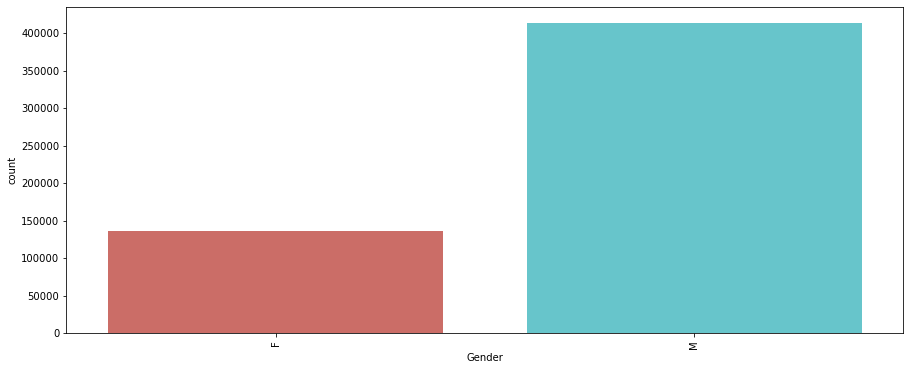

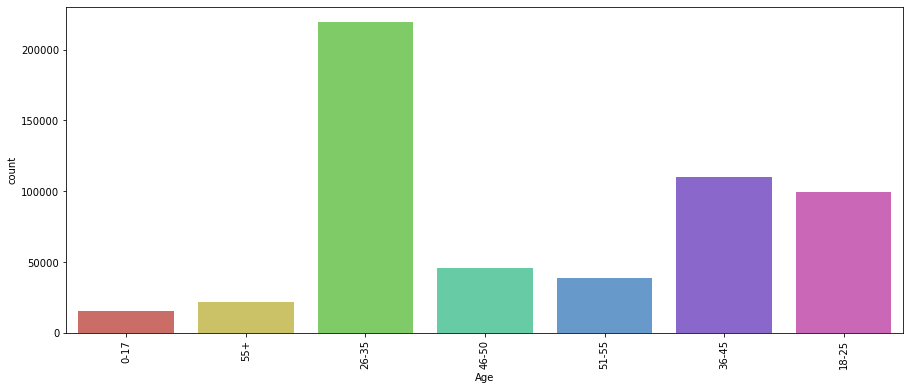

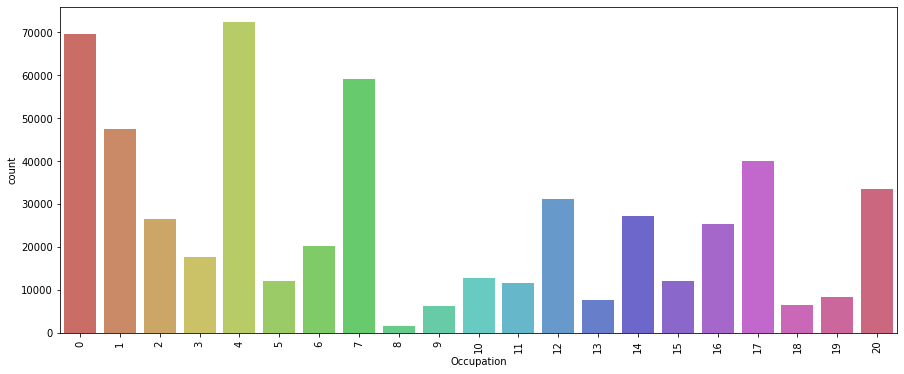

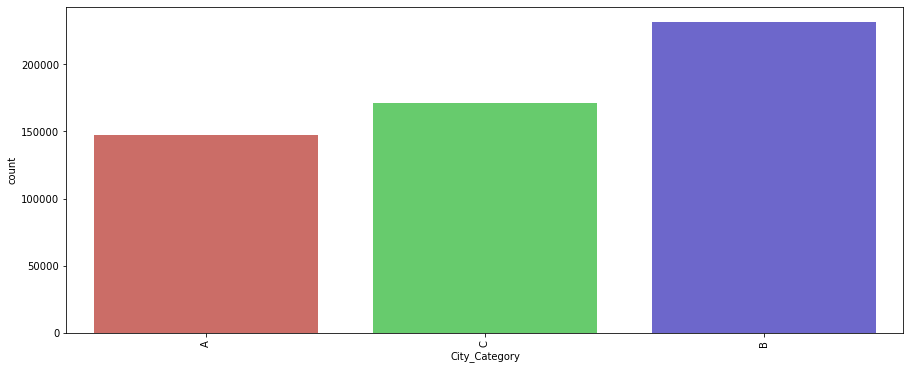

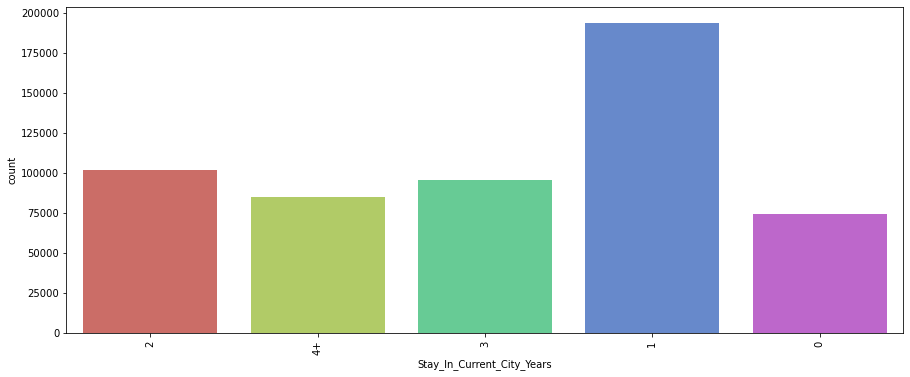

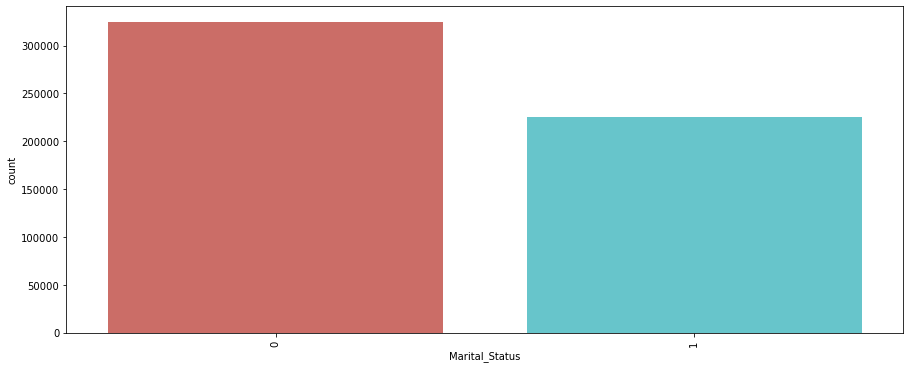

In [9]:
#Let's check Categorical values with the use of graphs.
for i in cat.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(cat[i], data = cat, palette = 'hls')
    plt.xticks(rotation = 90)
plt.show()

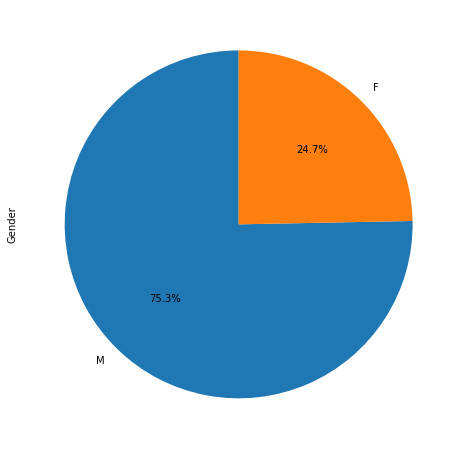

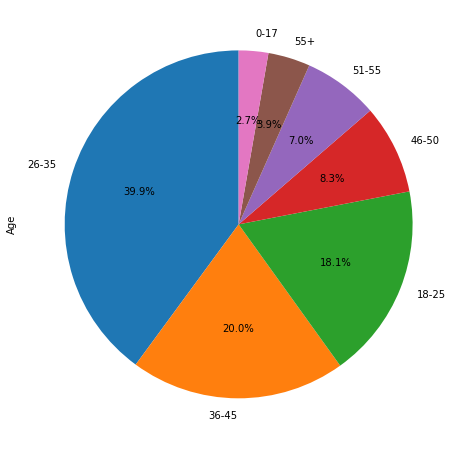

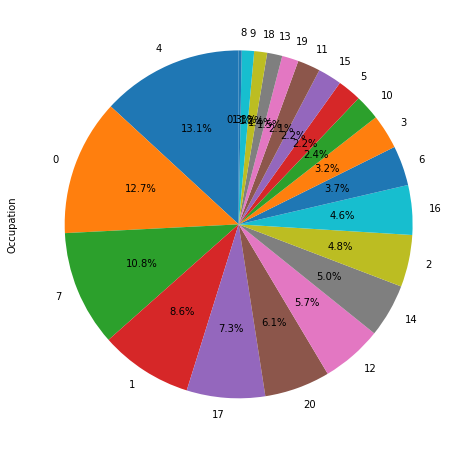

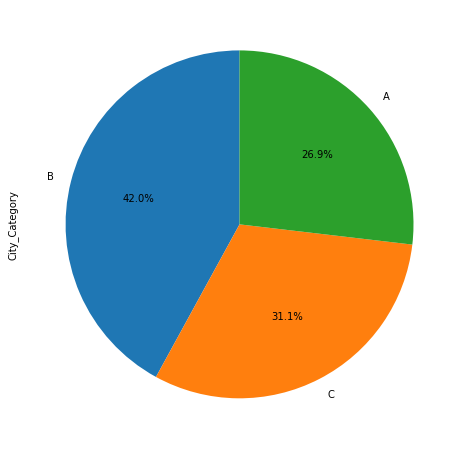

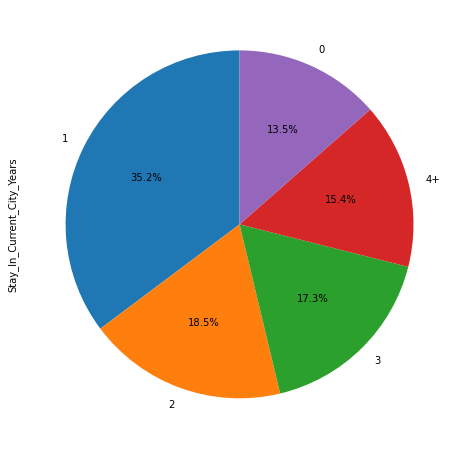

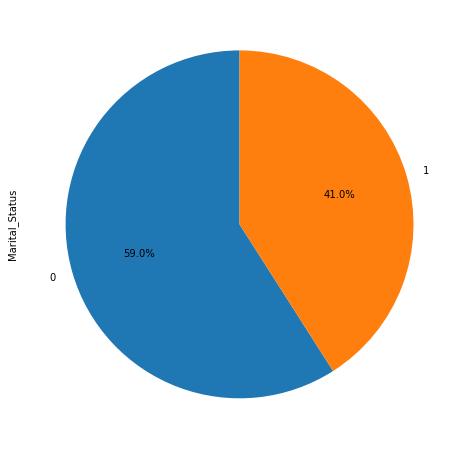

In [10]:
#:Let's check categorical values with the todal percentage of data
for i in cat.columns:
    plt.figure(figsize=(20,8))
    cat[i].value_counts().plot(kind = 'pie',autopct='%1.1f%%', startangle=90)
    plt.xticks(rotation = 90)
    plt.show()


In [11]:
#Let's find out how many missing values in dataset
sum(train.isna().sum())

556885

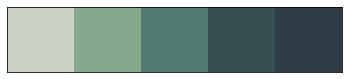

In [12]:
#Let's check missing values based on each coulmns
custom_colors = ["#cad2c5","#84a98c","#52796f","#354f52","#2f3e46"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

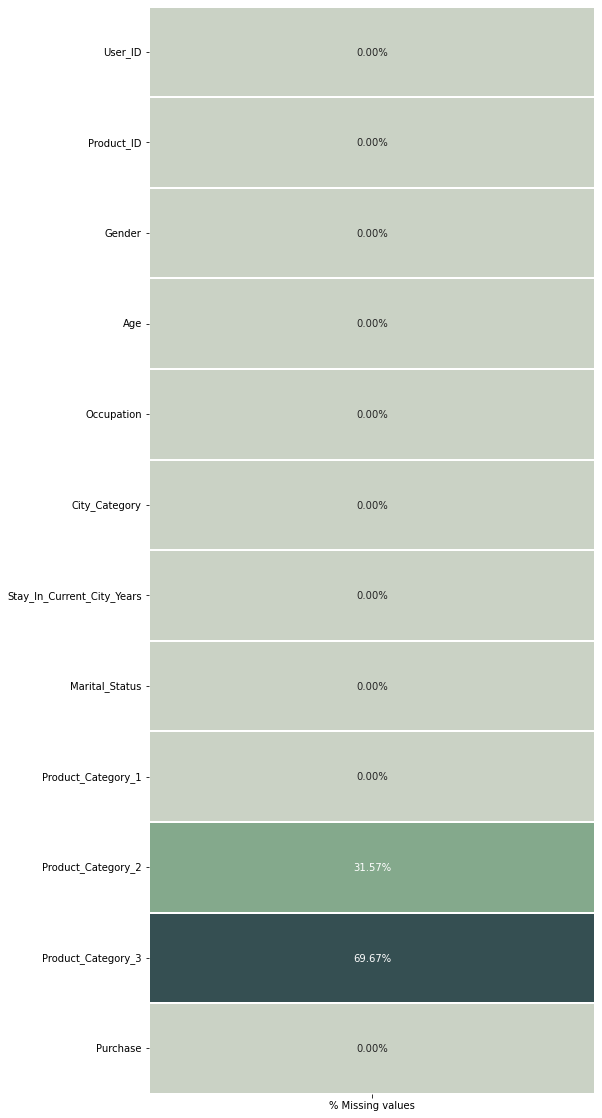

In [13]:
background_color = 'white'
missing = pd.DataFrame(columns = ['% Missing values'],data = train.isnull().sum()/len(train))
fig = plt.figure(figsize = (20, 20),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
sns.heatmap(missing,cbar = False,annot = True,fmt =".2%", linewidths = 2,cmap = custom_colors,vmax = 1, ax = ax0)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

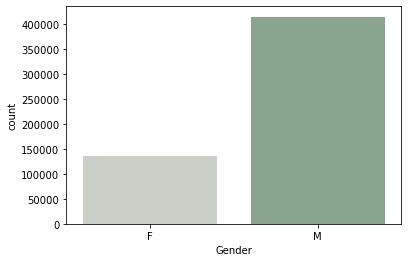

In [14]:
##Visualastion of Gender vs Purchase
sns.barplot(x='Gender',y='Purchase',data=train)
sns.countplot(x='Gender',data=train)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

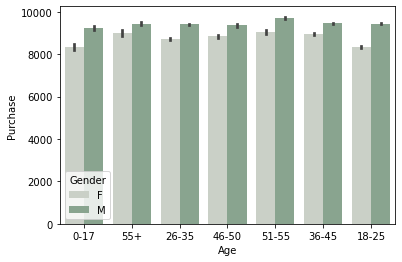

In [15]:
##Visualastion of Age vs Purchase
sns.barplot('Age','Purchase',hue='Gender',data=train)

# Purchasing of man is high then women

In [ ]:
#VIsualization of purchase with Occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=train)

In [ ]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=train)

In [ ]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=train)

In [ ]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=train)